In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [39]:
#loading data 
data = pd.read_excel('Final Dataset.xlsx', sheet_name='Sheet1', header=0)
data.head()

,titleartist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,OHEMA (with Crayon & Bella Shmurda)Victony,afrobeats,2023,112,38,91,-13,7,38,206,24,8,73
1,Holy GhostOmah Lay,afrobeats,2023,114,42,82,-11,13,49,186,47,6,76
2,NgoziCrayon,afrobeats,2023,115,43,90,-15,6,50,218,3,25,76
3,RushAyra Starr,afrobeats,2022,100,50,79,-8,10,38,185,4,6,78
4,Till We Die (feat. Ruger)Sarkodie,afrobeats,2023,102,55,52,-9,12,50,183,22,29,64


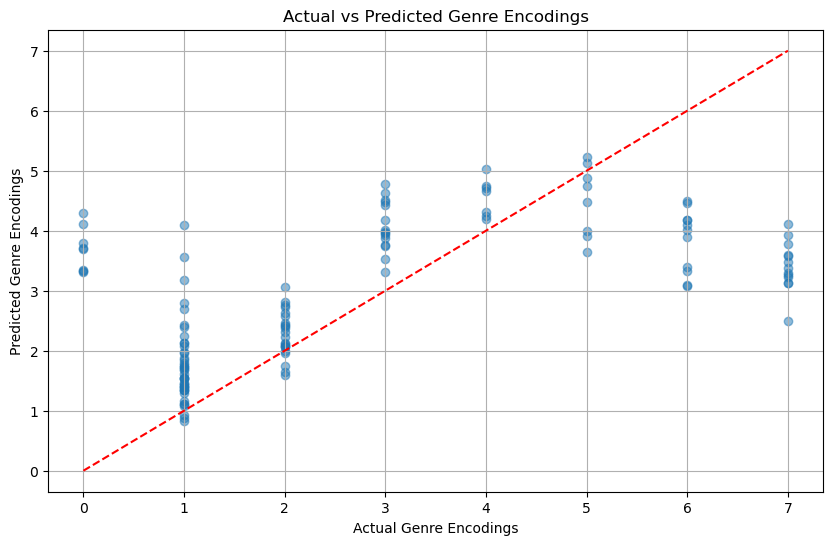

In [51]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Load the data
data = pd.read_excel('Final Dataset.xlsx', sheet_name='Sheet1', header=0)

# Initialize Label Encoder and encode the 'top genre' column
label_encoder = LabelEncoder()
data['top genre encoded'] = label_encoder.fit_transform(data['top genre'])

# Assuming that 'top genre encoded' values correctly represent genres from 0 upwards,
# Filter the data to include only the top 7 genres (encoded as 0 to 7)
filtered_data = data[data['top genre encoded'] <= 7]  # This includes genres 0 through 7

# Features for prediction
features = ['year', 'bpm', 'nrgy', 'dnce', 'dB', 'live', 'val', 'dur', 'acous', 'spch', 'pop']

# Prepare the predictor variables (X) and target variable (y)
X = filtered_data[features]
y = filtered_data['top genre encoded']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit Linear Regression to the Training set
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predict the genre encoding for the test set
y_pred = regressor.predict(X_test)

# Plotting actual vs predicted genres
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([0, 7], [0, 7], color='red', linestyle='--')  # Diagonal line for reference
plt.title('Actual vs Predicted Genre Encodings')
plt.xlabel('Actual Genre Encodings')
plt.ylabel('Predicted Genre Encodings')
plt.xticks(range(8))  # Adjusted to include 0 through 7
plt.yticks(range(8))  # Adjusted to include 0 through 7
plt.grid(True)
plt.show()
